## Semi-parametric SIR

*Author*: Erik M Volz @emvolz

*Date*: 2018-10-02


In [1]:
using DifferentialEquations

# BM model for beta(t): d beta(t) = beta(t) d W(t)
# Function to compute rates of change 
spsir_bm = function(du, u, p, t)
    S = u[1]
    I = u[2]
    R = u[3]
    beta = max(0., u[4])
    
    N = S + I + R
    gamma = p[1] 
    
    du[1] = -beta * S * I / N
    du[2] = beta * S * I / N - gamma * I
    du[3] = gamma * I
    du[4] = 0.
end

# Function to add noise
sigma_spsir = function(du, u, p, t )
    sigma = p[2]
    
    du[1] = 0.
    du[2] = 0.
    du[3] = 0.
    du[4] = sigma 
end

(::#3) (generic function with 1 method)

In [2]:
# BM for logbeta(t), with drift 
spsir_logbm_drift = function(du, u, p, t)
    S = u[1]
    I = u[2]
    R = u[3]
    beta = exp( u[4] )
    
    N = S + I + R
    gamma = p[1] 
    alpha = p[3]
    
    du[1] = -beta * S * I / N
    du[2] = beta * S * I / N - gamma * I
    du[3] = gamma * I
    du[4] = -alpha * I
end


(::#5) (generic function with 1 method)

### Simulation


In [3]:
# set random seed
srand( 1111 )

## Simulation of BM model 
# starting conditions
u0 = [50.;1.0;0.0;2.0]
tspan = (0.0,10.0)
# parameters gamma sigma 
p = [1.; 1.]
spsir_bm_prob = SDEProblem(spsir_bm, sigma_spsir, u0, tspan, p)
spsir_bm_sol = solve(spsir_bm_prob)

retcode: Success
Interpolation: 1st order linear
t: 525-element Array{Float64,1}:
  0.0        
  0.000928012
  0.00127347 
  0.00166211 
  0.00209933 
  0.0025912  
  0.00314455 
  0.00376707 
  0.00446741 
  0.00525529 
  0.00614166 
  0.00713882 
  0.00826063 
  ⋮          
  8.07628    
  8.1884     
  8.30928    
  8.44038    
  8.58378    
  8.74192    
  8.91786    
  9.1158     
  9.33847    
  9.58899    
  9.87081    
 10.0        
u: 525-element Array{Array{Float64,1},1}:
 [50.0, 1.0, 0.0, 2.0]                   
 [49.9982, 1.00089, 0.000928426, 1.99989]
 [49.9975, 1.00123, 0.00127425, 2.0171]  
 [49.9967, 1.00161, 0.00166344, 2.01404] 
 [49.9959, 1.00204, 0.00210145, 2.02556] 
 [49.9949, 1.00252, 0.00259444, 2.01273] 
 [49.9938, 1.00306, 0.00314934, 2.00516] 
 [49.9926, 1.00367, 0.00377396, 2.02844] 
 [49.9912, 1.00435, 0.0044771, 1.99867]  
 [49.9896, 1.00509, 0.00526871, 1.94886] 
 [49.9879, 1.00591, 0.00615994, 1.95739] 
 [49.986, 1.00685, 0.00716346, 1.9734]   
 [49.983

In [4]:
## Simulation of log-BM with drift model 

# starting condtions 
u0 = [50.;1.0;0.0;log(3.) ]
tspan = (0.0,10.0)
# parameters gamma sigma alpha
p = [1.; 1.; 0.1]
spsir_logbm_drift_prob = SDEProblem(spsir_logbm_drift, sigma_spsir, u0, tspan, p)
spsir_logbm_drift_sol = solve(spsir_logbm_drift_prob)

retcode: Success
Interpolation: 1st order linear
t: 550-element Array{Float64,1}:
  0.0        
  0.00064779 
  0.000903944
  0.00119212 
  0.00151631 
  0.00188103 
  0.00229134 
  0.00275294 
  0.00327224 
  0.00385645 
  0.00451369 
  0.00525308 
  0.00608489 
  ⋮          
  6.8556     
  7.0055     
  7.17239    
  7.36015    
  7.57138    
  7.80901    
  8.07635    
  8.3771     
  8.71544    
  9.09608    
  9.5243     
 10.0        
u: 550-element Array{Array{Float64,1},1}:
 [50.0, 1.0, 0.0, 1.09861]               
 [49.9981, 1.00126, 0.000648198, 1.09491]
 [49.9973, 1.00176, 0.000904739, 1.11133]
 [49.9965, 1.00234, 0.0011935, 1.11257]  
 [49.9955, 1.00298, 0.00151856, 1.1031]  
 [49.9944, 1.0037, 0.0018845, 1.09967]   
 [49.9932, 1.0045, 0.00229649, 1.09794]  
 [49.9919, 1.00538, 0.00276037, 1.08039] 
 [49.9903, 1.00638, 0.00328272, 1.09176] 
 [49.9886, 1.00751, 0.00387099, 1.0904]  
 [49.9867, 1.00879, 0.00453359, 1.09455] 
 [49.9845, 1.01022, 0.00528001, 1.09102] 
 [49.982

### Visualization


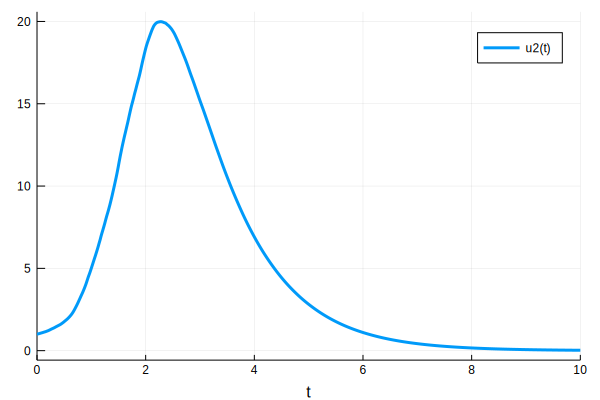

In [5]:
## Plotting for BM model 
using Plots
# Plot evolution of number infected
plot( spsir_bm_sol , vars = 2 )

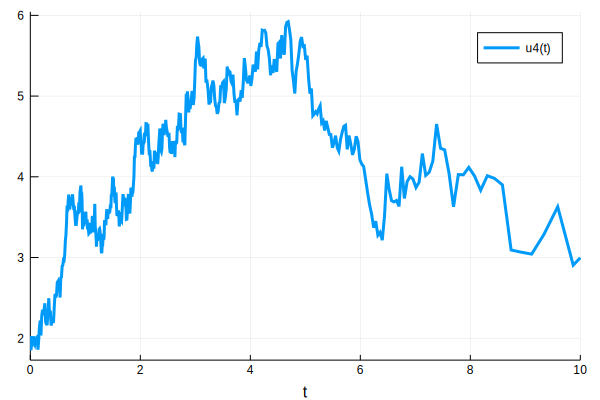

In [6]:
# Plot evolution of transmission rate 
plot( spsir_bm_sol , vars = 4 )

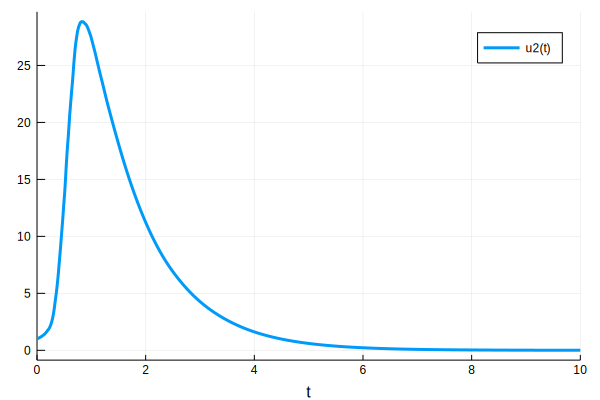

In [7]:
## Plotting for BM with drift model 
# Plot evolution of number infected
plot( spsir_logbm_drift_sol , vars = 2 )


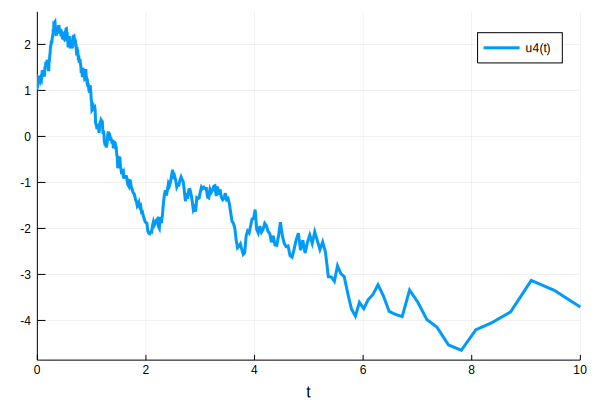

In [8]:
# Plot evolution of transmission rate 
plot( spsir_logbm_drift_sol , vars = 4 )